In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Zadanie 2.1
Na jednym rysunku wykonaj wykresy funkcji x, x^2 +1, x^3 +2 na przedziale [−2, 2]
wraz z legendą.

In [2]:
X_wektor = np.linspace(-2, 2, 200)

In [3]:
f2 = lambda x : x**2 + 1
Y2 = f2(X_wektor)
f3 = lambda x : x**3 + 2
Y3 = f3(X_wektor)

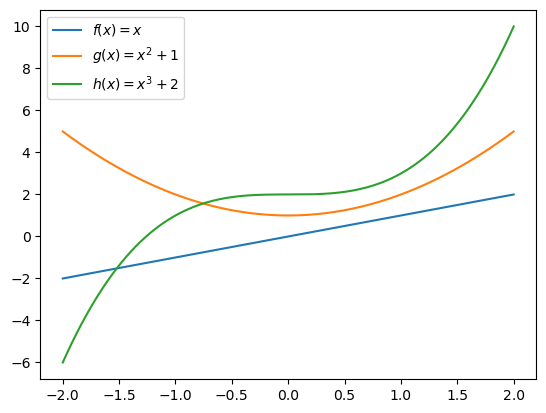

In [4]:
plt.plot(X_wektor, X_wektor, label="$f(x) = x$")
plt.plot(X_wektor, Y2, label="$g(x) = x^2 + 1$")
plt.plot(X_wektor, Y3, label="$h(x) = x^3 + 2$")
plt.legend()
plt.show()

# Zadanie 2.2
Wykonaj wykresy wielomianu
$w(x) := (x − 1)^4 = x^4 − 4x^3 + 6x^2 − 4x + 1$
w węzłach równoodległych na przedziale [0.9995, 1.0005] korzystając z obydwu tych wzorów.
Który wzór jest dokładniejszy i dlaczego?

In [5]:
X_wektor = np.linspace(0.9995, 1.0005, 100)
w1 = lambda x: (x-1)**4
w2 = lambda x: x**4 - 4*x**3 + 6*x**2 - 4*x + 1

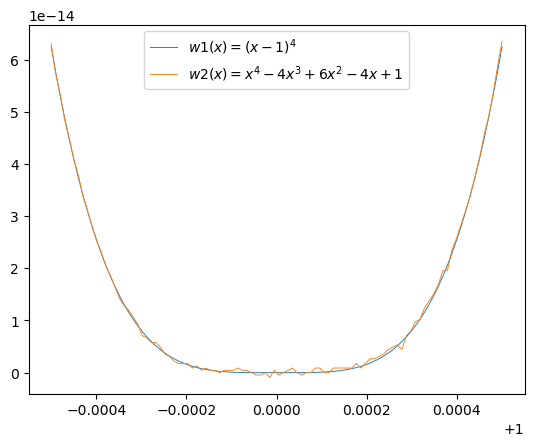

In [6]:
plt.plot(X_wektor, w1(X_wektor), label = "$w1(x) = (x-1)^4$", linewidth = '0.65')
plt.plot(X_wektor, w2(X_wektor), label = "$w2(x) = x^4 − 4x^3 + 6x^2 − 4x + 1$", linewidth = '0.65')
plt.legend()
plt.show()

# Zadanie 2.3
Zaimplementuj funkcję:
$$f(x)=\left\{ \begin{array}{rl}
2x & \textrm{dla $x > 0$} \\ 3 & \textrm{dla $x \leq 0$}
\end{array} \right.$$
na dwa sposoby:
 tak aby przyjmowała skalar i zwracała skalar,
 w formie wektorowej, przyjmującej element typu numpy.array.
Mając daną tablicę/wektor elementów x = [x0, x1, . . . , xn−1] dla dowolnie wybranego wektora
x, porównaj czas, jaki jest potrzebny do znalezienia tablicy/wektora wartości
y = [f (x0), f (x1), . . . , f (xn−1)] przy wykorzystaniu tych funkcji. Czy występują znaczące róż-
nice? Czy zależą od n?

In [7]:
def funkcja_skalar(i):
    if i > 0:
        return 2 * i
    else:
        return 3
def dla_calej_listy(v):
    return [funkcja_skalar(j) for j in v]

In [8]:
def funkcja_wektor(v):
    return 3.0*(v<=0) + 2 * v * (v>0)

In [9]:
n = 200
wektor = np.linspace(-100, 100, n)

In [31]:
import timeit
print("skalarnie:", timeit.timeit("[funkcja_skalar(j) for j in wektor]", globals=globals(), number=100_000))
print("wektorowo:", timeit.timeit("funkcja_wektor(wektor)", globals=globals(), number=100_000))


skalarnie: 2.6548122680000006
wektorowo: 0.5867704739999908


# Zadanie 2.4
Napisz funkcję, której parametrami są funkcja rzeczywista $f$, brzegi przedziału $[a, b]$ oraz liczba naturalna $n$, która przybliża wartość
$$max\{f(x) : x \in [a, b]\} \approx max\{f(x_i) : i \in \{1, 2, ..., n\}\}$$
gdzie $x_i$ są równoodległymi węzłami w przedziale $[a, b]$.

In [11]:
def funkcja_przyblizenie(f, a: float, b: float, n: int):
    return max(f(np.linspace(a, b, n)))

funkcja_przyklad = lambda x:(x**2)
print(funkcja_przyblizenie(lambda x:-(x**2), -10, 10, 1000))

-0.00010020030040050053


In [12]:
przyblizanie = lambda a, b, n, f : max(f(np.linspace(a, b, n)))
print(przyblizanie(-10, 10, 20000000, np.cos))

0.9999999999998784


# Zadanie 2.5
Zaimplementuj funkcję mycos, która oblicza $cos(x)$ dla zadanej wartości $x$, korzystając z przybliżenia
$$ cos(x) \approx \sum^n_{k=0} \frac{(-1)^kx^{2k}}{(2k)!} $$
Sporządź wykres dla $x \in [-5\pi, 5\pi]$ i $n=5$. Określ jakie $n$ należy wybrać, aby błąd aproksymacji
był mniejszy niż 0.1.


In [13]:
mycos = lambda x, n: sum([(-1)**k * x**(2*k) / np.math.factorial(2*k) for k in range(n)])

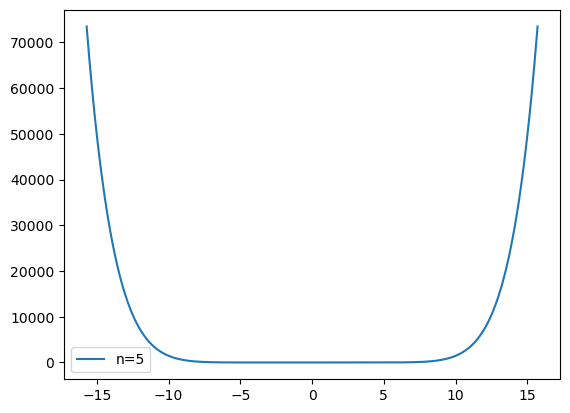

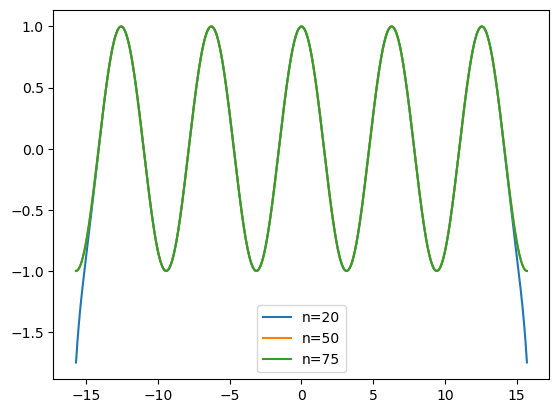

In [29]:
space = np.linspace(-5*np.pi, 5*np.pi, 1_0_000)

import matplotlib.pyplot as plt

plt.plot(space, mycos(space, 5), label="n=5")
plt.legend()
plt.show()

plt.plot(space, mycos(space, 20), label="n=20")
plt.plot(space, mycos(space, 50), label="n=50")
plt.plot(space, mycos(space, 75), label="n=75")
plt.legend()
plt.show()

# Zadanie 2.6
Zaimplementuj funkcję, która oblicza $e^x$ dla zadanych wartości $x$ oraz $n$, korzystając z przybliżenia
$$e^x \approx \sum^n_{k=0} \frac{x^k}{k!}$$
Biorąc pod uwagę przedział [-100, 100] określ, czy funkcja równie dobrze działa dla dodatnich, jak i ujemnych liczb rzeczywistych. Napisz program demnstrujący zaobserwowaną zależność.

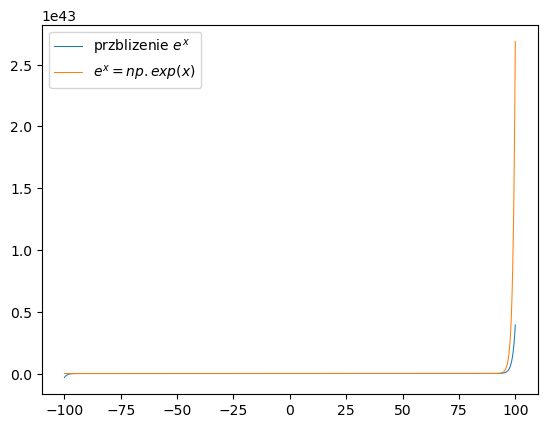

In [15]:
space = np.linspace(-100, 100, 100000)
aproximation_26 = lambda x: sum([x**k / np.math.factorial(k) for k in range(90)])

plt.plot(space, aproximation_26(space), label="przblizenie $e^x \approx \sum^n_{k=0} \frac{x^k}{k!}$", lw="0.75")
plt.plot(space, np.exp(space), label="$e^x = np.exp(x)$", lw="0.75")
plt.legend()
plt.show()